In [1]:
# import libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
# set global parameters
sns.set(style='darkgrid') 
pd.set_option('display.precision', 2)
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings('ignore')

## Data overview

In [3]:
# read csv file and print our 5 rows
df = pd.read_csv('C:/GeekBrainsPractice/10_data_analysis_python/2/homework/Python_analysis/kc_final.csv')
df.loc[0:6].style

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,1,6414100192,2014-12-09,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,2,5631500400,2015-02-25,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,3,2487200875,2014-12-09,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,4,1954400510,2015-02-18,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503
5,5,7237550310,2014-05-12,1225000.000000,4,4.500000,5420,101930,1.000000,0,0,3,11,3890,1530,2001,0,98053,47.656100,-122.005000,4760,101930
6,6,1321400060,2014-06-27,257500.000000,3,2.250000,1715,6819,2.000000,0,0,3,7,1715,0,1995,0,98003,47.309700,-122.327000,2238,6819


In [4]:
# change dataset columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
# number of rows before data cleaning
print(len(df.index))

21613


In [7]:
# find NaN values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

plot_nas(df)

No NAs found


In [8]:
# print out statistics for price target
X = df.iloc[:, 3:21]
y = df['price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                        0.00
Time:                        23:38:53   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [9]:
# additional parameters for vizualization
color = [['skyblue', 'olive', 'gold'], 
         ['teal', 'limegreen', 'lightcoral'], 
         ['violet', 'peru', 'aqua'],
         ['palegreen', 'khaki', 'salmon'],
         ['royalblue', 'teal', 'darkorange']]

param = [[df.columns[3], df.columns[4], df.columns[5]], 
         [df.columns[6], df.columns[7], df.columns[8]], 
         [df.columns[9], df.columns[10], df.columns[11]],
         [df.columns[12], df.columns[13], df.columns[14]],
         [df.columns[15], df.columns[19], df.columns[20]]]          

In [10]:
# function for building multiple histograms
def mult_hist(data, row, col, x_axis, color, figsize):    
    sns.set(style='darkgrid')

    fig, axs = plt.subplots(row, col, figsize=figsize)
    fig.suptitle('Distribution of real estate data', fontsize=17)

    for i in range(row):
        for j in range(col):
            sns.histplot(data=data, x=x_axis[i][j], kde=True, color=color[i][j], ax=axs[i, j]) 

    plt.show()

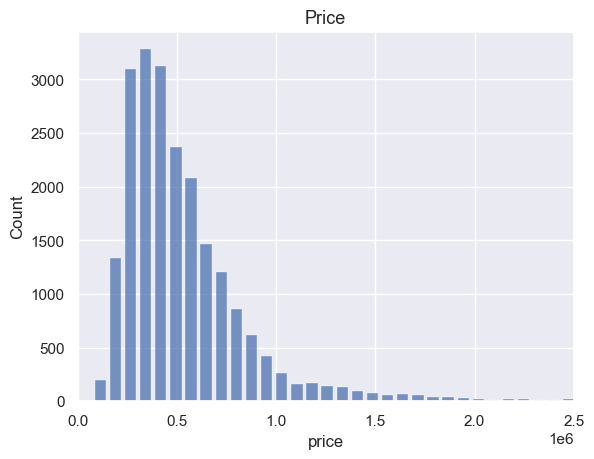

In [11]:
# histogram of the target
fig, ax = plt.subplots()
sns.histplot(df['price'], shrink=.75, bins=100, ax=ax)
ax.set_xlim(0, 2.5e6)
plt.title('Price', fontsize=13)
plt.show()

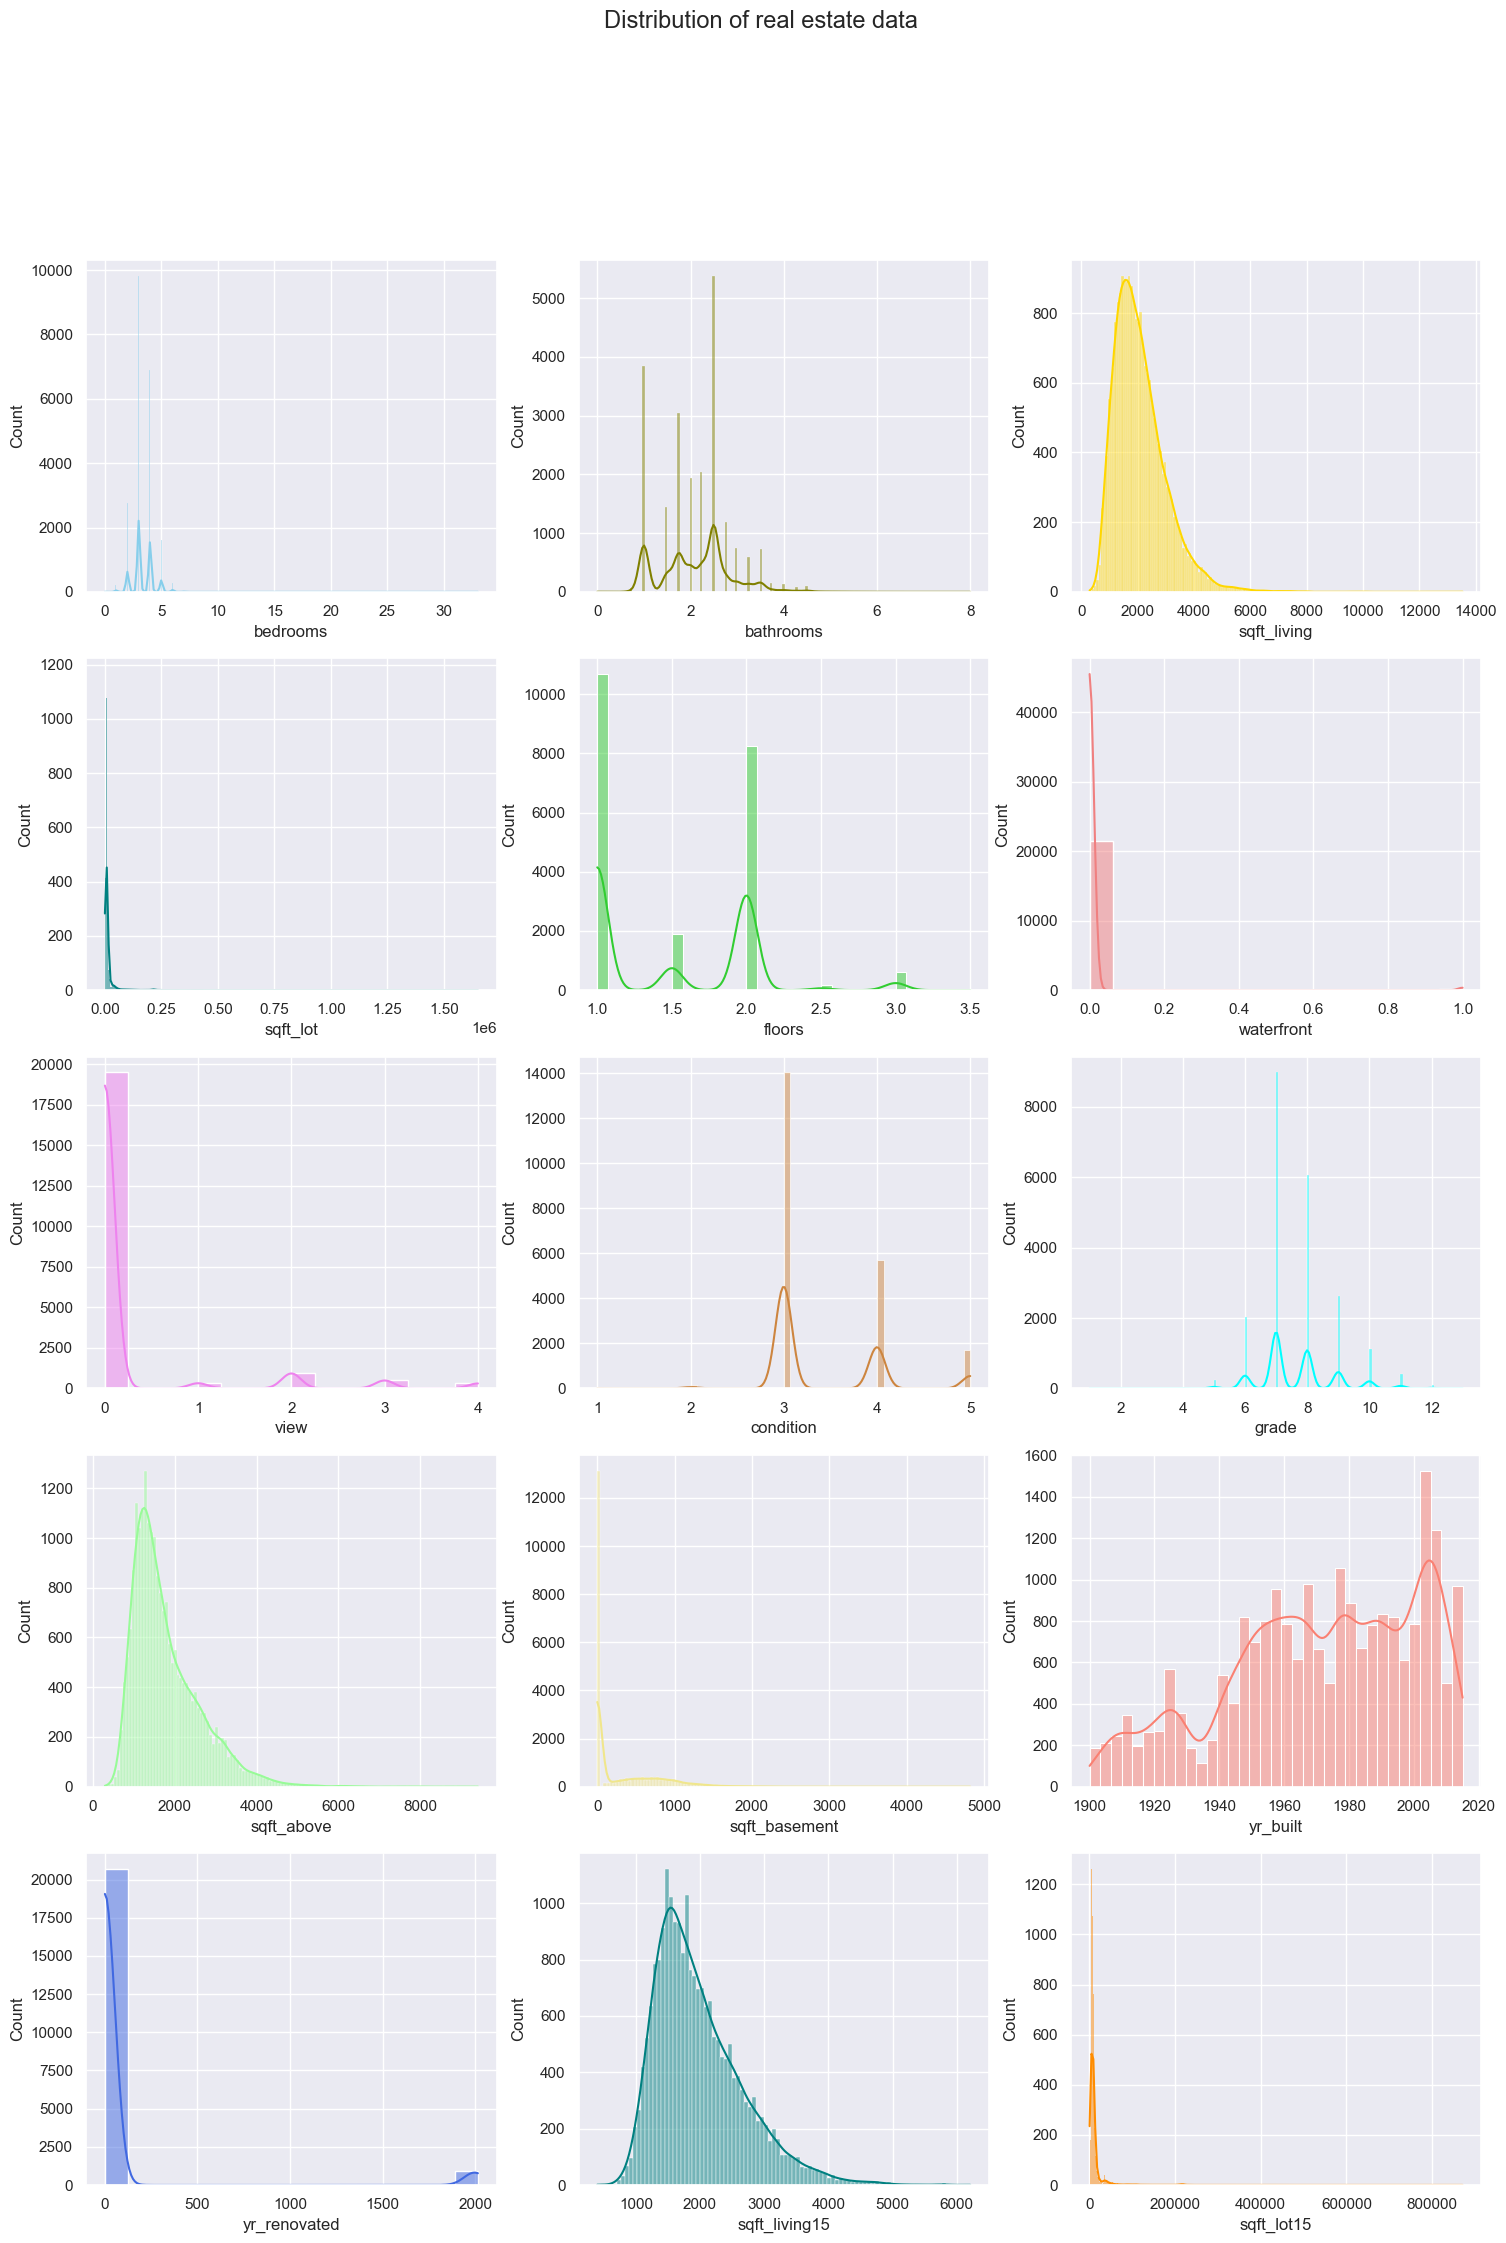

In [12]:
# histograms of the features
mult_hist(df, row=5, col=3, x_axis=param, color=color, figsize=(18, 25))

## Задача 1

### 1.2 Изучите стоимости недвижимости

### 1.3 Изучите распределение квадратуры жилой

### 1.4 Изучите распределение года постройки

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

### 2.2 Изучите распределение этажей домов

### 2.3 Изучите распределение состояния домов

## Задача 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.